### Importando bibliotecas

In [77]:
tensorflow_version 1x 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1x`. This will be interpreted as: `1.x`.


After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow is already loaded. Please restart the runtime to change versions.


In [78]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D #, BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from keras.utils import np_utils

### Lendo os dados de treino: ----

In [79]:
def load(f):
    return np.load(f)['arr_0']

x_train = load('k49-train-imgs.npz')
y_train = load('k49-train-labels.npz')

x_test = load('k49-test-imgs.npz')
y_test = load('k49-test-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#scaler = preprocessing.StandardScaler().fit(x_train)


### Quantas observações por classe:

In [80]:
observacoes_por_classe = pd.Series(y_train).astype(int).value_counts()

In [81]:
observacoes_por_classe.sort_values(ascending=True)  ##classe com o menor número de observações

45     392
44     417
3      777
36    1598
32    1718
29    1993
22    2063
42    2139
43    2397
23    2451
16    2565
31    3060
33    3394
48    3523
14    3867
13    4165
8     4714
26    5132
47    6000
12    6000
27    6000
15    6000
24    6000
46    6000
30    6000
4     6000
39    6000
2     6000
6     6000
1     6000
18    6000
19    6000
41    6000
28    6000
40    6000
34    6000
38    6000
5     6000
17    6000
9     6000
11    6000
0     6000
21    6000
37    6000
25    6000
20    6000
7     6000
35    6000
10    6000
dtype: int64

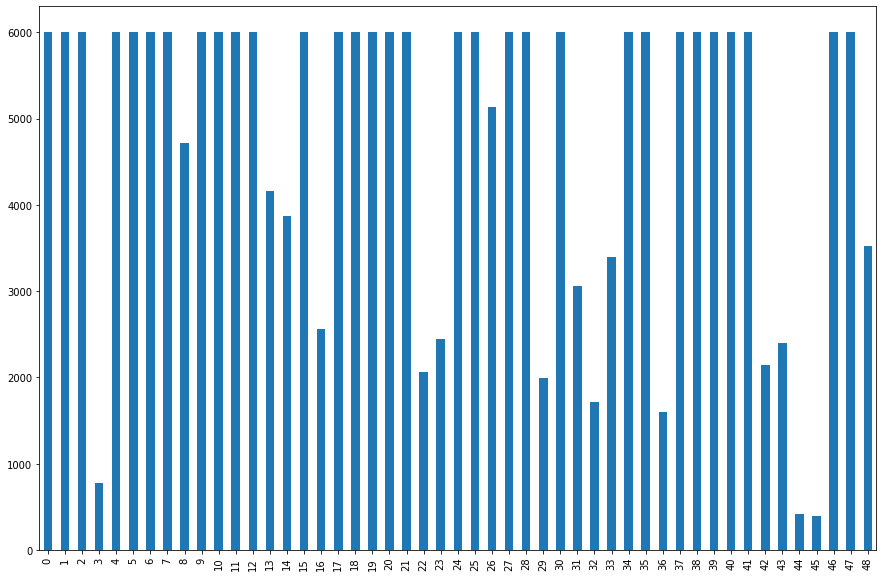

In [82]:
observacoes_por_classe.sort_index().plot.bar(figsize=(15, 10))

### Dividindo entre treino e validação

In [83]:
x_treino,x_val, y_treino, y_val  = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

### Regressão Logística Multinomial

In [84]:
#logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg = LogisticRegression(penalty='none', max_iter=500)
# fit the model on the whole dataset
logreg.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=500, penalty='none')

In [85]:
## Acurácia, acertos geral, na amostrane validação
logreg.score(x_val, y_val)

0.6760269403739806

### Árvore de classificação:

In [86]:
arvore= tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [87]:
## Acurácia, acertos geral, na amostrane validação
arvore.score(x_val, y_val)

0.6038129666688185

### 4 Vizinhos Mais Próximos:

In [88]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Test accuracy: 0.9092376218449423


### 5 Vizinhos Mais Próximos:

In [89]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, weights='distance')
Test accuracy: 0.9056011017149743


### 3 Vizinhos Mais Próximos:

In [90]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
Test accuracy: 0.9081832461859575


### Floresta Aleatória:

In [91]:
ra_fo = RandomForestClassifier(n_estimators=100)
ra_fo.fit(x_treino, y_treino)
ra_fo.score(x_val, y_val)

0.8804251931228886

## Redes Neurais:

In [92]:
y_treino_catg = np_utils.to_categorical(y_treino)
y_val_catg = np_utils.to_categorical(y_val)

In [93]:
IMG_ROWS = 28
IMG_COLS = 28

NUM_CLASSES = 49
NO_EPOCHS = 25
BATCH_SIZE = 128

In [100]:
num_images_train = x_treino.shape[0]
x_shaped_treino = x_treino.reshape(num_images_train, IMG_ROWS, IMG_COLS, 1)

num_images_val = x_val.shape[0]
x_shaped_val = x_val.reshape(num_images_val, IMG_ROWS, IMG_COLS, 1)

In [101]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [102]:
# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [103]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 6, 6, 32)         

In [104]:
history = model.fit(x_shaped_treino, y_treino_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          validation_data=(x_shaped_val, y_val_catg))

Train on 185892 samples, validate on 46473 samples
Epoch 1/25
185892/185892 [==============================] - 18s 97us/sample - loss: 0.9974 - acc: 0.7364 - val_loss: 0.3009 - val_acc: 0.9187
Epoch 2/25
185892/185892 [==============================] - 18s 98us/sample - loss: 0.5040 - acc: 0.8598 - val_loss: 0.2236 - val_acc: 0.9411
Epoch 3/25
185892/185892 [==============================] - 21s 112us/sample - loss: 0.4145 - acc: 0.8838 - val_loss: 0.1876 - val_acc: 0.9504
Epoch 4/25
185892/185892 [==============================] - 18s 96us/sample - loss: 0.3701 - acc: 0.8956 - val_loss: 0.1718 - val_acc: 0.9552
Epoch 5/25
185892/185892 [==============================] - 17s 93us/sample - loss: 0.3420 - acc: 0.9036 - val_loss: 0.1604 - val_acc: 0.9584
Epoch 6/25
185892/185892 [==============================] - 17s 92us/sample - loss: 0.3223 - acc: 0.9077 - val_loss: 0.1511 - val_acc: 0.9615
Epoch 7/25
185892/185892 [==============================] - 17s 91us/sample - loss: 0.3053 - acc

In [105]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_val)
#get the indices to be plotted
y_true = np.argmax(y_val_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape

array([0.96985346])

## AMOSTRA DE TESTE:  APLICAÇÃO DE REDES NEURAIS

In [106]:
y_train_catg = np_utils.to_categorical(y_train)

num_images_train = x_train.shape[0]
x_shaped_train = x_train.reshape(num_images_train, IMG_ROWS, IMG_COLS, 1)

In [107]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [108]:
## Aplicando o modelo no dataset de teste completo
y_test_catg = np_utils.to_categorical(y_test)

num_images_test = x_test.shape[0]
x_shaped_test = x_test.reshape(num_images_test, IMG_ROWS, IMG_COLS, 1)

In [109]:
# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [110]:
history = model.fit(x_shaped_train, y_train_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1)

Train on 232365 samples
Epoch 1/25
232365/232365 [==============================] - 20s 85us/sample - loss: 0.9065 - acc: 0.7591
Epoch 2/25
232365/232365 [==============================] - 20s 84us/sample - loss: 0.4621 - acc: 0.8718
Epoch 3/25
232365/232365 [==============================] - 19s 84us/sample - loss: 0.3813 - acc: 0.8938
Epoch 4/25
232365/232365 [==============================] - 19s 84us/sample - loss: 0.3424 - acc: 0.9040
Epoch 5/25
232365/232365 [==============================] - 20s 85us/sample - loss: 0.3189 - acc: 0.9100
Epoch 6/25
232365/232365 [==============================] - 19s 83us/sample - loss: 0.3004 - acc: 0.9150
Epoch 7/25
232365/232365 [==============================] - 19s 83us/sample - loss: 0.2871 - acc: 0.9191
Epoch 8/25
232365/232365 [==============================] - 20s 84us/sample - loss: 0.2723 - acc: 0.9220
Epoch 9/25
232365/232365 [==============================] - 19s 84us/sample - loss: 0.2662 - acc: 0.9241
Epoch 10/25
232365/232365 [====

In [111]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_test)
#get the indices to be plotted
y_true = np.argmax(y_test_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape
#.sum())/ y_true.shape

array([0.94313436])

In [112]:
## Matrix de confusão:
retorno = classification_report(y_true, predicted_classes)

In [113]:
print(retorno)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1000
           1       0.99      0.97      0.98      1000
           2       0.95      0.96      0.96      1000
           3       0.90      0.87      0.88       126
           4       0.95      0.96      0.95      1000
           5       0.95      0.90      0.92      1000
           6       0.96      0.92      0.94      1000
           7       0.92      0.93      0.92      1000
           8       0.88      0.95      0.92       767
           9       0.94      0.94      0.94      1000
          10       0.98      0.96      0.97      1000
          11       0.97      0.95      0.96      1000
          12       0.95      0.89      0.92      1000
          13       0.97      0.83      0.90       678
          14       0.93      0.91      0.92       629
          15       0.96      0.95      0.96      1000
          16       0.98      0.97      0.97       418
          17       0.90    

### "Forçando um dataset balanceado"

In [114]:
balanceamento = observacoes_por_classe.min()
balanceamento

392

In [115]:
## Transformar numpy em dataframe para esse sorteio: ---
df_treino = pd.DataFrame(x_train)
df_treino['y'] =  pd.DataFrame(y_train)

In [116]:
df_treino

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1,0,0,0,0,0,0,0,0,0,0,...,3,11,2,0,0,0,0,0,0,19
2,0,0,0,0,0,0,0,0,0,85,...,0,0,0,0,0,0,0,0,0,20
3,0,0,0,0,0,0,0,0,0,0,...,255,155,0,0,0,0,0,0,0,30
4,0,0,0,0,0,0,0,0,0,0,...,23,165,36,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
232361,0,0,0,0,0,0,0,3,109,87,...,0,0,0,0,0,0,0,0,0,5
232362,0,0,0,0,0,0,0,0,0,0,...,194,240,96,0,0,0,0,0,0,10
232363,0,0,0,0,0,0,0,0,0,19,...,0,0,0,0,0,0,0,0,0,39


In [117]:
df_treino_balanceado = pd.DataFrame()
for y in list(df_treino.y.unique()):
    df_parcial = df_treino[df_treino.y==y].sample(n = balanceamento)
    df_treino_balanceado = pd.concat([df_treino_balanceado, df_parcial])


In [118]:
y_train_balanceado = df_treino_balanceado.y.to_numpy()
df_treino_balanceado.drop(columns=['y'], inplace = True)
y_train_balanceado

array([30, 30, 30, ..., 32, 32, 32], dtype=uint8)

In [119]:
x_train_balanceado = df_treino_balanceado.to_numpy() 
x_train_balanceado.shape

(19208, 784)

## Refazendo os modelos, para o dataset balanceado

### Dividindo entre treino e validação

In [132]:
x_treino,x_val, y_treino, y_val  = train_test_split(
...     x_train_balanceado, y_train_balanceado, test_size=0.20)

### Regressão Logística Multinomial

In [121]:
#logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg = LogisticRegression(penalty='none', max_iter=1000)
# fit the model on the whole dataset
logreg.fit(x_treino, y_treino)

LogisticRegression(max_iter=1000, penalty='none')

In [122]:
## Acurácia, acertos geral, na amostrane validação
logreg.score(x_val, y_val)

0.48047891723060904

### Árvore de classificação:

In [123]:
arvore= tree.DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [124]:
## Acurácia, acertos geral, na amostrane validação
arvore.score(x_val, y_val)

0.42321707444039564

### 4 Vizinhos Mais Próximos:

In [125]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Test accuracy: 0.8011452368558043


### 5 Vizinhos Mais Próximos:

In [126]:
clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, weights='distance')
Test accuracy: 0.7938573659552316


### 3 Vizinhos Mais Próximos:

In [127]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_treino, y_treino)
print('Evaluating', clf)

test_score = clf.score(x_val, y_val)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')
Test accuracy: 0.7990629880270692


### Floresta Aleatória:

In [128]:
ra_fo = RandomForestClassifier(n_estimators=100)
ra_fo.fit(x_treino, y_treino)
ra_fo.score(x_val, y_val)

0.7691306611140031

## Redes Neurais:

In [133]:
y_treino_catg = np_utils.to_categorical(y_treino)
y_val_catg = np_utils.to_categorical(y_val)

In [134]:
IMG_ROWS = 28
IMG_COLS = 28

NUM_CLASSES = 49
NO_EPOCHS = 25
BATCH_SIZE = 128

In [135]:
num_images_train = x_treino.shape[0]
x_shaped_treino = x_treino.reshape(num_images_train, IMG_ROWS, IMG_COLS, 1)

num_images_val = x_val.shape[0]
x_shaped_val = x_val.reshape(num_images_val, IMG_ROWS, IMG_COLS, 1)

In [136]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

history = model.fit(x_shaped_treino, y_treino_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1,
          validation_data=(x_shaped_val, y_val_catg))




Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 6, 6, 32)        

In [137]:

#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_val)
#get the indices to be plotted
y_true = np.argmax(y_val_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape

array([0.91983342])

### Redes neurais no teste

In [138]:
y_train_balanceado_catg = np_utils.to_categorical(y_train_balanceado)

num_images_train_balanceado = x_train_balanceado.shape[0]
x_shaped_train_balanceado = x_train_balanceado.reshape(num_images_train_balanceado, IMG_ROWS, IMG_COLS, 1)

In [139]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))

model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [140]:
# Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [141]:

model.summary()

history = model.fit(x_shaped_train_balanceado, y_train_balanceado_catg,
          batch_size=BATCH_SIZE,
          epochs=NO_EPOCHS,
          verbose=1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_33 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 6, 6, 32)        

In [142]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_shaped_test)
#get the indices to be plotted
y_true = np.argmax(y_test_catg,axis=1)

((y_true==predicted_classes).sum())/ y_true.shape
#.sum())/ y_true.shape

array([0.84668068])

In [143]:
## Matrix de confusão:
retorno = classification_report(y_true, predicted_classes)
print(retorno)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.97      0.92      0.94      1000
           2       0.86      0.93      0.89      1000
           3       0.49      0.96      0.65       126
           4       0.83      0.88      0.85      1000
           5       0.88      0.81      0.84      1000
           6       0.84      0.85      0.84      1000
           7       0.89      0.88      0.89      1000
           8       0.68      0.83      0.75       767
           9       0.85      0.85      0.85      1000
          10       0.92      0.78      0.85      1000
          11       0.92      0.80      0.86      1000
          12       0.84      0.78      0.81      1000
          13       0.84      0.70      0.76       678
          14       0.77      0.77      0.77       629
          15       0.91      0.82      0.86      1000
          16       0.89      0.95      0.92       418
          17       0.82    